In [3]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('/content/mobile_price.csv')

In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [7]:
df.shape

(2000, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:

df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [10]:
df.isna().apply(pd.value_counts).T

,False
battery_power,2000
blue,2000
clock_speed,2000
dual_sim,2000
fc,2000
four_g,2000
int_memory,2000
m_dep,2000
mobile_wt,2000
n_cores,2000


In [11]:
corr = df.corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [12]:
a = corr[['price_range']]
a

,price_range
battery_power,0.200723
blue,0.020573
clock_speed,-0.006606
dual_sim,0.017444
fc,0.021998
four_g,0.014772
int_memory,0.044435
m_dep,0.000853
mobile_wt,-0.030302
n_cores,0.004399


In [13]:
df.drop(['clock_speed','mobile_wt','touch_screen','m_dep','n_cores'],axis=1,inplace=True)

In [14]:
df.head()

,battery_power,blue,dual_sim,fc,four_g,int_memory,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,wifi,price_range
0,842,0,0,1,0,7,2,20,756,2549,9,7,19,0,1,1
1,1021,1,1,0,1,53,6,905,1988,2631,17,3,7,1,0,2
2,563,1,1,2,1,41,6,1263,1716,2603,11,2,9,1,0,2
3,615,1,0,0,0,10,9,1216,1786,2769,16,8,11,1,0,2
4,1821,1,0,13,1,44,14,1208,1212,1411,8,2,15,1,0,1


In [15]:
b = df.corr()

In [16]:
a1 = b[['price_range']]
a1

,price_range
battery_power,0.200723
blue,0.020573
dual_sim,0.017444
fc,0.021998
four_g,0.014772
int_memory,0.044435
pc,0.033599
px_height,0.148858
px_width,0.165818
ram,0.917046


Text(0.5, 1.0, 'Correlation_personal_loan')

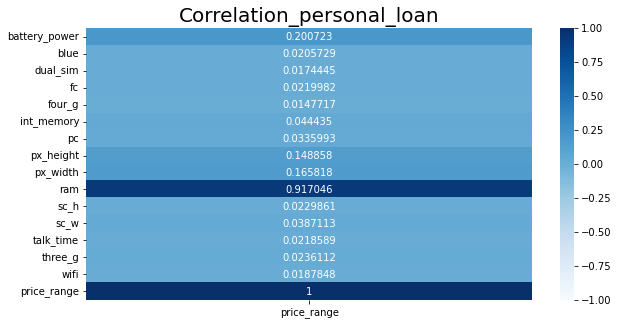

In [17]:
plt.figure(figsize=(10,5))
sns.heatmap(a1,vmax=+1,vmin=-1,cmap='Blues',fmt='g',annot=True)
plt.title('Correlation_personal_loan',Fontsize=20)

In [18]:
df.columns

Index(['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'wifi', 'price_range'],
      dtype='object')

In [19]:
X = df[['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'wifi']]

In [20]:
y=df[['price_range']]

In [21]:
y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.3,random_state=1)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 15)
(600, 15)
(1400, 1)
(600, 1)


In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
model = GaussianNB()

In [27]:
model.fit(X_train,y_train)

GaussianNB()

In [28]:
y_pred = model.predict(X_test)

In [29]:
y_pred

array([0, 1, 1, 0, 3, 1, 1, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 2, 3, 3,
       1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 0, 3, 3, 0, 0, 1, 1, 1, 0, 2, 1,
       0, 1, 3, 2, 2, 2, 2, 3, 1, 3, 2, 3, 2, 3, 3, 1, 0, 2, 1, 2, 1, 2,
       1, 2, 3, 2, 1, 2, 0, 2, 3, 1, 2, 1, 0, 0, 0, 3, 2, 2, 3, 2, 2, 1,
       2, 1, 3, 0, 1, 2, 1, 2, 3, 0, 2, 3, 3, 3, 0, 2, 2, 1, 1, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 2, 0, 0, 0, 3, 0, 1, 0, 1, 1, 0, 3,
       0, 3, 3, 0, 3, 2, 1, 1, 0, 0, 2, 1, 0, 3, 0, 1, 0, 1, 3, 3, 2, 1,
       0, 1, 1, 0, 3, 1, 3, 1, 3, 2, 3, 2, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 0, 3, 0, 3, 0, 0, 2, 3, 3, 1, 2, 2, 2, 3, 1, 3, 0, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 1, 2, 1, 0, 1, 0, 2, 1, 0, 2, 0, 2, 0, 2, 1,
       0, 1, 2, 1, 3, 3, 1, 2, 2, 1, 1, 2, 3, 3, 2, 1, 0, 1, 2, 1, 2, 3,
       2, 2, 0, 1, 2, 0, 3, 3, 3, 0, 2, 1, 0, 2, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 1, 0, 1, 2, 3, 1, 1, 1, 2, 3, 2, 1, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 2, 3, 2, 1,

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
accuracy_score(y_test,y_pred)*100

78.0

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       135
           1       0.69      0.73      0.71       149
           2       0.69      0.70      0.69       168
           3       0.87      0.84      0.85       148

    accuracy                           0.78       600
   macro avg       0.79      0.78      0.79       600
weighted avg       0.78      0.78      0.78       600



In [33]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[118,  17,   0,   0],
       [ 11, 109,  29,   0],
       [  0,  32, 117,  19],
       [  0,   0,  24, 124]])

Text(0.5, 1.0, 'Correlation_personal_loan')

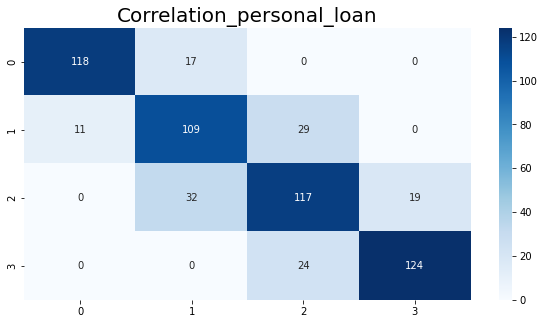

In [34]:
plt.figure(figsize=(10,5))
sns.heatmap(cf,cmap='Blues',fmt='g',annot=True)
plt.title('Correlation_personal_loan',Fontsize=20)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier(max_depth=9,criterion='entropy',n_estimators=500)

In [37]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=500)

In [38]:
rf_pred = rf.predict(X_test)

In [40]:
rf_pred

array([0, 1, 1, 0, 3, 1, 0, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 2, 3, 3,
       1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 2, 0, 3, 3, 0, 0, 1, 1, 1, 0, 2, 1,
       0, 1, 2, 2, 1, 2, 2, 3, 1, 3, 2, 3, 1, 3, 3, 1, 0, 2, 1, 3, 2, 2,
       0, 2, 3, 2, 1, 2, 0, 3, 3, 1, 2, 1, 0, 0, 0, 3, 1, 2, 3, 2, 2, 0,
       1, 1, 3, 0, 0, 1, 1, 3, 3, 0, 2, 3, 3, 3, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 2, 0, 0, 0, 3, 0, 1, 1, 1, 1, 0, 3,
       0, 3, 3, 0, 3, 2, 2, 1, 0, 0, 3, 1, 0, 2, 0, 1, 0, 1, 3, 3, 1, 1,
       0, 1, 1, 1, 3, 1, 3, 1, 2, 2, 3, 1, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 1, 3, 0, 3, 1, 0, 2, 3, 3, 1, 2, 1, 2, 3, 1, 3, 1, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1,
       0, 1, 2, 1, 3, 3, 0, 3, 2, 1, 0, 2, 3, 3, 2, 1, 0, 1, 2, 1, 3, 2,
       2, 2, 0, 1, 2, 0, 3, 3, 3, 0, 2, 1, 0, 2, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 1, 3, 3, 0, 1, 0, 2, 3, 2, 1, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 3, 3, 3, 2,

In [49]:
accuracy_score(y_test,rf_pred)*100

87.0

In [50]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       135
           1       0.80      0.84      0.82       149
           2       0.85      0.81      0.83       168
           3       0.93      0.92      0.92       148

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



In [51]:
cf = confusion_matrix(y_test,rf_pred)
cf

array([[125,  10,   0,   0],
       [ 12, 125,  12,   0],
       [  0,  21, 136,  11],
       [  0,   0,  12, 136]])

Text(0.5, 1.0, 'Correlation_personal_loan')

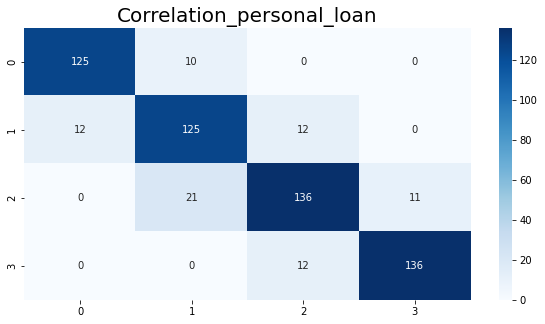

In [52]:
plt.figure(figsize=(10,5))
sns.heatmap(cf,cmap='Blues',fmt='g',annot=True)
plt.title('Correlation_personal_loan',Fontsize=20)